**Import Library**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [4]:
train_images[100].shape

(32, 32, 3)

In [119]:
model = models.Sequential()
model.add(layers.Conv2D( 64, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.1))

In [120]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 64)        

**Flatten & Fully Connected Layer**

In [121]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(100))

In [122]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 64)        

**Compile and train the model**

In [123]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [124]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=200, validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 33s 131ms/step - loss: 1.8516 - accuracy: 0.3352 - val_loss: 1.4567 - val_accuracy: 0.4730
Epoch 2/10
250/250 [==============================] - 33s 132ms/step - loss: 1.3828 - accuracy: 0.5043 - val_loss: 1.3158 - val_accuracy: 0.5257
Epoch 3/10
250/250 [==============================] - 35s 140ms/step - loss: 1.2303 - accuracy: 0.5627 - val_loss: 1.1527 - val_accuracy: 0.5895
Epoch 4/10
250/250 [==============================] - 37s 147ms/step - loss: 1.1135 - accuracy: 0.6059 - val_loss: 1.0750 - val_accuracy: 0.6226
Epoch 5/10
250/250 [==============================] - 33s 132ms/step - loss: 1.0338 - accuracy: 0.6359 - val_loss: 0.9953 - val_accuracy: 0.6455
Epoch 6/10
250/250 [==============================] - 32s 127ms/step - loss: 0.9606 - accuracy: 0.6622 - val_loss: 0.9411 - val_accuracy: 0.6707
Epoch 7/10
250/250 [==============================] - 32s 128ms/step - loss: 0.9076 - accuracy: 0.6819 - val_loss: 0.9672 - val_ac

**Evaluate the model**

In [125]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.8273 - accuracy: 0.7151


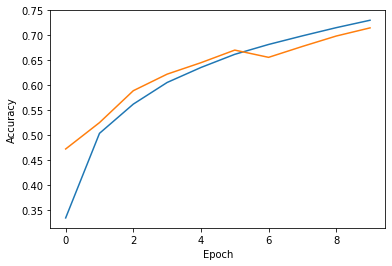

In [126]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




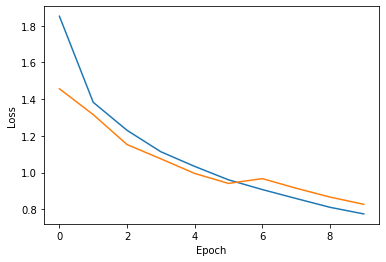

In [127]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


